In [11]:
import numpy as np
import pandas as pd
from scipy.io import loadmat
from scipy.linalg import block_diag
import matplotlib.pyplot as plt
%matplotlib inline


In [16]:
data = loadmat("active-optics_calibrations.mat")
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'asms_sh1', 'asms_sh2', 'asms_sh3', 'asms_sh4', 'asms_sh5', 'asms_sh6', 'asms_sh7', 'asms_sh_rbm1', 'asms_sh_rbm2', 'asms_sh_rbm3', 'asms_sh_rbm4', 'asms_sh_rbm5', 'asms_sh_rbm6', 'asms_sh_rbm7', 'asms_sh_bm1', 'asms_sh_bm2', 'asms_sh_bm3', 'asms_sh_bm4', 'asms_sh_bm5', 'asms_sh_bm6', 'asms_sh_bm7', 'sh48_bm1', 'sh48_bm2', 'sh48_bm3', 'sh48_bm4', 'sh48_bm5', 'sh48_bm6', 'sh48_bm7', 'sh48_kl1', 'sh48_kl2', 'sh48_kl3', 'sh48_kl4', 'sh48_kl5', 'sh48_kl6', 'sh48_kl7', 'sh48_rbm1', 'sh48_rbm2', 'sh48_rbm3', 'sh48_rbm4', 'sh48_rbm5', 'sh48_rbm6', 'sh48_rbm7', 'dfs_rbm1', 'dfs_kl1'])

In [20]:
D_sh48rbm = data["sh48_rbm1"]
D_sh48bm = data["sh48_bm1"]
D_sh48asm = data["sh48_kl1"]
D_asm = data["asms_sh1"]
D_shrbm = data["asms_sh_rbm1"]
D_shbm = data["asms_sh_bm1"]

In [21]:
np.linalg.cond(D_asm)

9.46015

In [22]:
Q  =D_sh48asm@np.linalg.pinv(D_asm)@D_shbm

In [23]:
np.linalg.pinv(D_sh48bm)@D_sh48rbm


array([[ 8.2341843e+00,  1.6422070e+01],
       [ 1.4973404e+01, -6.1730061e+00],
       [-3.4819717e+00, -1.9886940e+00],
       [-3.9857566e-01, -2.4384589e+00],
       [ 1.6415050e+00, -1.0355256e+00],
       [ 3.1424862e-01, -3.2886127e+01],
       [ 3.3451180e+01, -1.9836345e-01],
       [-2.8068171e+00,  1.5597029e+00],
       [ 9.4542408e-01, -4.8542649e-02],
       [ 1.1988392e+00,  6.8780088e-01],
       [ 1.2755527e+00, -1.5737764e+00],
       [ 8.8678253e-01,  3.7157893e-01],
       [ 5.2732629e-01,  1.9474268e+00],
       [-1.4609039e+00, -1.4012673e+00],
       [-2.3808115e+00, -1.4946024e+00],
       [-9.0641403e-01,  1.6002932e+00],
       [-2.5749192e-01,  2.2840953e-01],
       [ 2.6664805e-01, -1.5208459e-01],
       [ 2.1288574e-02, -8.5764933e+00],
       [ 8.3785172e+00, -1.3623808e-01],
       [ 1.0047971e+00,  2.1440274e-01],
       [-3.1475857e-01, -1.3127835e+00],
       [ 9.5661663e-02, -3.3729804e-01],
       [-5.6342888e-01, -5.1509112e-01],
       [-7.23228

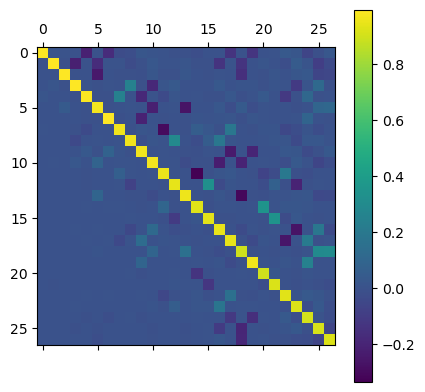

In [29]:
plt.matshow(np.linalg.pinv(D_sh48bm)@Q)
plt.colorbar()


In [8]:
D_dfs = data["dfs_rbm1"]
D_dfsasm = data["dfs_kl1"]


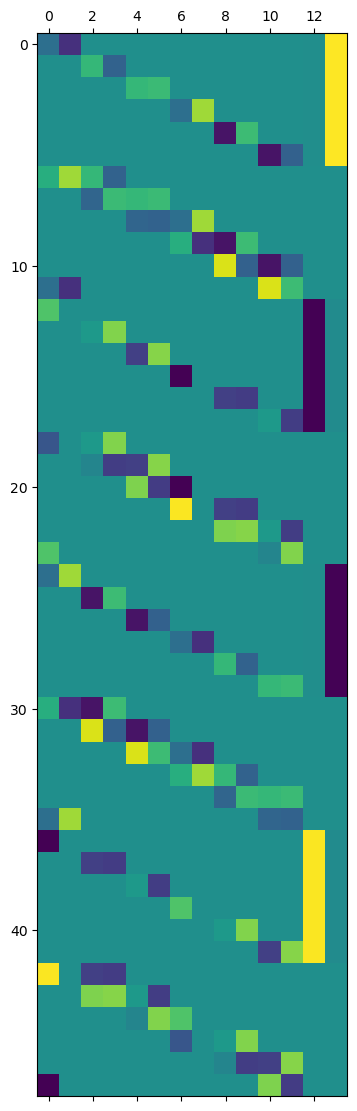

In [9]:
plt.matshow(D_dfs)

In [10]:
np.linalg.cond(D_dfs),np.linalg.cond(D_asm),np.linalg.cond(D_shrbm),np.linalg.cond(D_dfsasm),np.linalg.cond(Q_dfs)

NameError: name 'Q_dfs' is not defined

In [11]:
(u,s,vt) = np.linalg.svd(Q_dfs)
plt.semilogy(s,'.')
plt.grid()

NameError: name 'Q_dfs' is not defined

<StemContainer object of 3 artists>

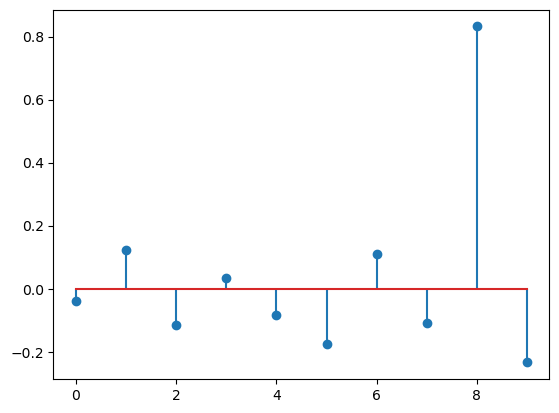

In [ ]:
plt.stem(vt[-2,-10:])     

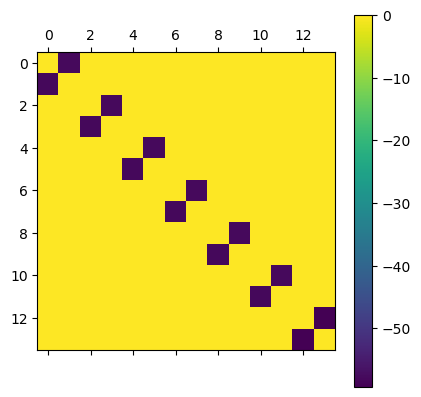

In [ ]:
plt.matshow(np.linalg.pinv(D_asm)@D_shrbm)
plt.colorbar()

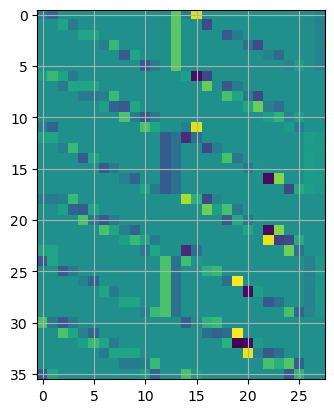

In [ ]:
plt.imshow(np.hstack([D_dfs,Q_dfs]))
plt.grid()

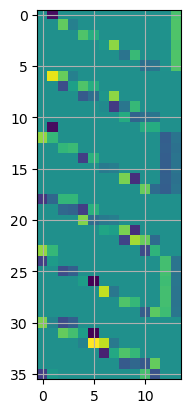

In [ ]:
plt.imshow(D_dfs-Q_dfs)
plt.grid()

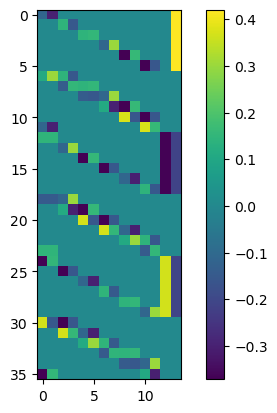

In [ ]:
plt.imshow(D_dfs)
plt.colorbar()

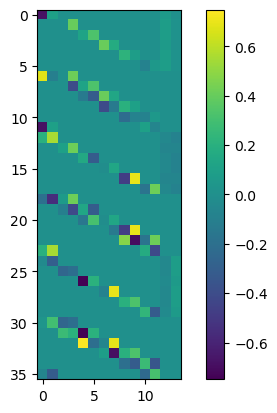

In [ ]:
plt.imshow(D_dfsasm)
plt.colorbar()

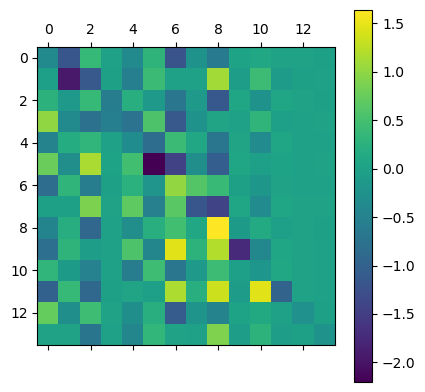

In [12]:
D_asm = block_diag(*[data[f"asms_sh{k}"] for k in range(1,8)])
D_shrbm = block_diag(*[data[f"asms_sh_rbm{k}"] for k in range(1, 8)])
Q_dfs  =D_dfsasm@np.linalg.pinv(D_asm)@D_shrbm
plt.matshow(np.linalg.pinv(D_dfs)@Q_dfs)
plt.colorbar()

In [56]:
df = pd.read_parquet("dfs.parquet")
df


,M1RigidBodyMotions
0,"[1.7970784582654886e-11, 1.3139172042042624e-1..."
1,"[1.6027167440424428e-11, 1.3145429189620472e-1..."


In [57]:
dfs = np.vstack(df['M1RigidBodyMotions'])[-1,:]

In [58]:
dfs*1e6

array([ 1.60271674e-05,  1.31454292e-05,  7.26002453e-05, -5.13777354e-04,
        5.96756533e-04, -7.99823749e-07,  1.64531756e-05,  9.35135389e-06,
        1.09258637e-04, -3.62224917e-04,  6.12695783e-04, -8.15262950e-07,
        2.09162184e-05, -1.62237550e-05, -2.72594412e-05,  6.37143227e-04,
        7.79014908e-04, -1.02909478e-06,  2.36467165e-05, -4.12702685e-06,
        7.18216528e-05,  1.66396577e-04,  8.80886086e-04, -1.17572770e-06,
        3.64370617e-05,  6.81685828e-06,  1.08648437e-04, -2.62358801e-04,
        1.35706468e-03, -1.79736130e-06,  3.28596594e-05, -1.73192602e-06,
       -1.96737193e-05,  6.70765457e-05,  1.22364008e-03, -1.62840629e-06,
        2.22277700e-05, -5.39999989e-05,  0.00000000e+00,  1.95885996e-03,
        8.06315015e-04,  0.00000000e+00])

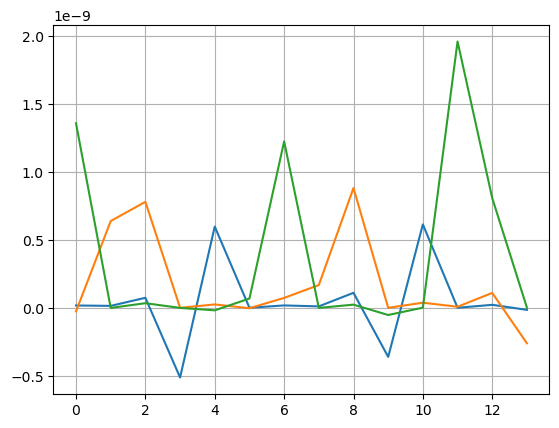

In [61]:
plt.plot(dfs.reshape(3,-1).T)
plt.grid()

In [ ]:
1e6*np.linalg.pinv(D_dfs-Q_dfs)@dfs


array([ 0.11151229,  0.6139675 , -0.24425119,  1.657907  , -0.18220049,
        0.70621717, -0.3185175 ,  0.6797531 , -0.07008104,  0.39321664,
        0.33364433,  0.9192924 ,  0.38024774,  1.0707185 ], dtype=float32)

In [55]:
df

,M1RigidBodyMotions


In [52]:
df = pd.read_parquet("sh48.parquet")
sh48 = np.vstack(df["M1ModeShapes"])[-1,:]


([<matplotlib.axis.XTick at 0x7fddd2f0d760>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

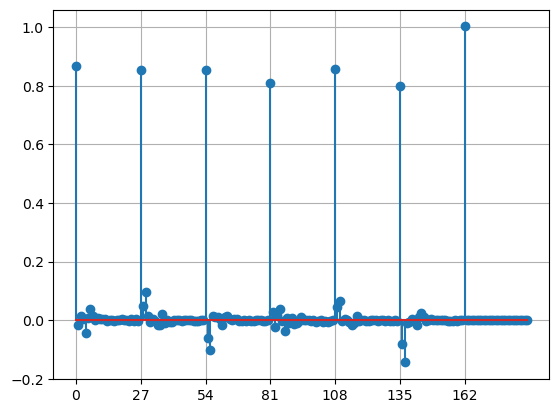

In [43]:
D = []
for k in range(1,8):
    D_sh48bm = data[f"sh48_bm{k}"]
    D_sh48asm = data[f"sh48_kl{k}"]
    D_asm = data[f"asms_sh{k}"]
    D_shbm = data[f"asms_sh_bm{k}"]
    Q  =D_sh48asm@np.linalg.pinv(D_asm)@D_shbm
    D += [D_sh48bm-Q]
D = block_diag(*D)
c = np.linalg.pinv(D)@sh48
plt.stem(c*1e4)
plt.grid()
plt.xticks(range(0,7*27,27))

([<matplotlib.axis.XTick at 0x7fddd286c280>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

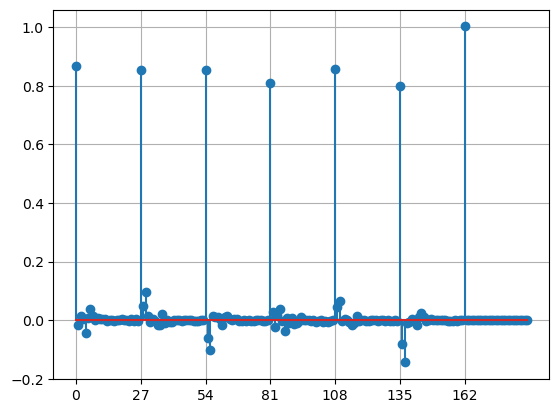

In [47]:
plt.stem(sh48*1e4)
plt.grid()
plt.xticks(range(0,7*27,27))

In [ ]:
D_sh48 = block_diag(*[data[f"sh48_rbm{i}"] for i in range(1,8)])

In [80]:
dfs_data = loadmat("closed-loop_DFS.mat")
dfs_data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'dfs_m1_rbm'])

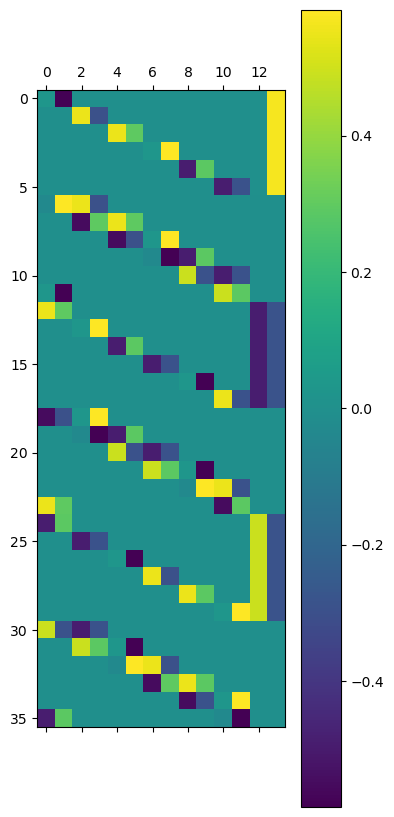

In [45]:
D_dfs = dfs_data['dfs_m1_rbm']
plt.matshow(D_dfs)
plt.colorbar()

(48, 40)

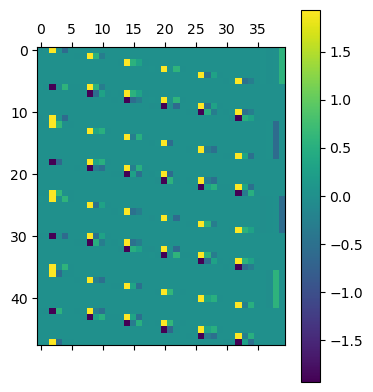

In [123]:
D_dfs = dfs_data['dfs_m1_rbm']
plt.matshow(D_dfs)
plt.colorbar()
D_dfs.shape

In [109]:
(u,s,vt) = np.linalg.svd(D_dfs,full_matrices=False)
(np.linalg.cond(D_dfs),
s)

(3423636700.0,
 array([8.6433706e+00, 7.7308698e+00, 7.7308660e+00, 5.4665565e+00,
        5.4665542e+00, 3.8654461e+00, 2.1382852e+00, 2.1381469e+00,
        1.8751671e+00, 1.8749480e+00, 1.6987283e+00, 1.6765711e+00,
        1.6763811e+00, 1.6544070e+00, 1.2011781e+00, 1.1849887e+00,
        1.1848624e+00, 1.1698425e+00, 2.0927294e-04, 6.5775617e-05,
        1.5232485e-05, 1.2439763e-05, 8.6558648e-06, 6.0604252e-06,
        1.6513825e-07, 1.4577989e-07, 1.1449353e-07, 9.5990480e-08,
        8.2403595e-08, 7.5181454e-08, 5.7722868e-08, 5.4433542e-08,
        4.2936424e-08, 3.4673839e-08, 3.3578488e-08, 2.5703130e-08,
        2.1562437e-08, 1.4094432e-08, 1.0759966e-08, 2.5246167e-09],
       dtype=float32))

In [129]:
np.sum(s<1e-2)

22

(40,)

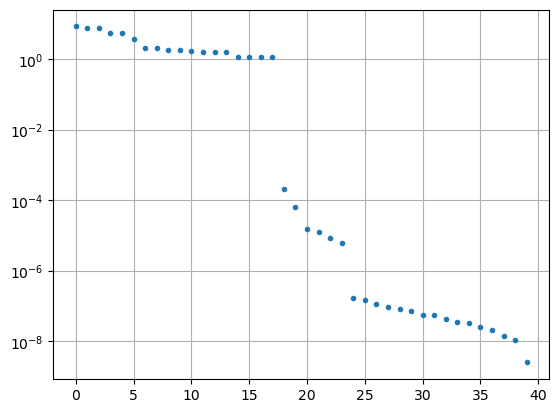

In [102]:
plt.semilogy(s,'.')
plt.grid()
s.shape

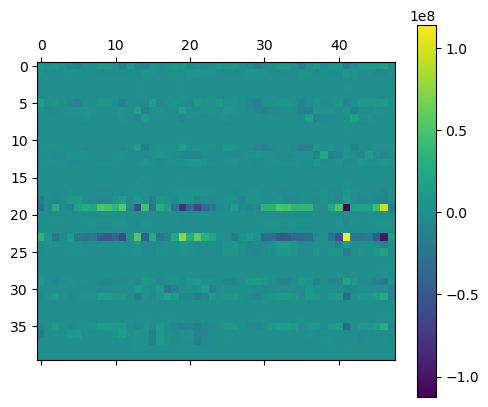

In [122]:
plt.matshow(np.linalg.pinv(D_dfs))
plt.colorbar()

In [126]:
i_s = 1/s
i_s[18:]=0
R_dfs = vt.T@np.diag(i_s)@u.T

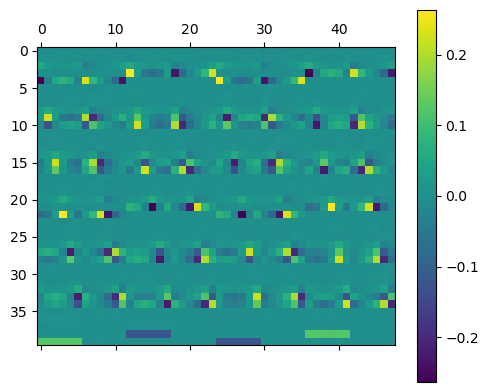

In [127]:
plt.matshow(R_dfs)
plt.colorbar()

In [144]:
i_s = 1/s
i_s[18:]=0
R_dfs = vt.T@np.diag(i_s)@u.T
1e6*np.linalg.pinv(D_dfs)@dfs

array([ 1.5000000e+01, -6.5000000e+00,  6.5917969e-03,  2.9687500e-01,
        7.3437500e-01,  1.3500000e+01, -3.0000000e+00,  2.0000000e+00,
       -3.9062500e-03,  7.8125000e-02,  1.4062500e+00, -4.5000000e+00,
        2.0000000e+00, -5.0000000e-01,  4.8828125e-03, -2.8125000e-01,
        1.1250000e+00,  7.5000000e-01, -4.5000000e+00,  3.4000000e+01,
       -2.9296875e-02,  3.1250000e-01,  1.0312500e+00, -3.1000000e+01,
        5.0000000e+00,  1.5000000e+00, -3.4179688e-03,  2.3437500e-01,
        5.0000000e-01, -8.0000000e+00, -2.5000000e+00,  1.0000000e+00,
       -1.9531250e-03,  5.0000000e-01,  1.0937500e+00,  4.7500000e+00,
       -6.0000000e+00, -2.1875000e+00,  9.3750000e-02,  1.2968750e+00],
      dtype=float32)

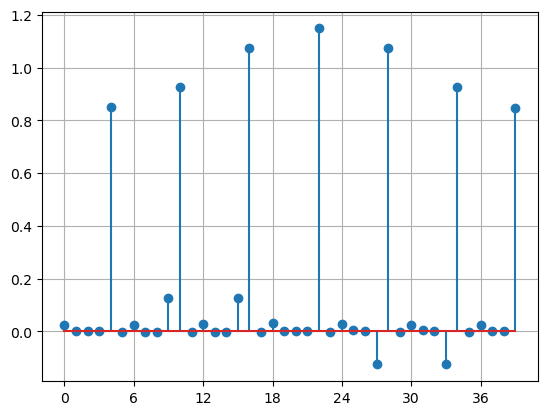

In [145]:
plt.stem(1e6*R_dfs@dfs)
plt.xticks(range(0,6*7,6))
plt.grid()

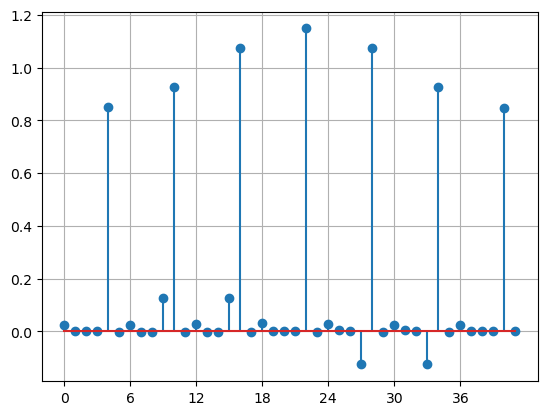

In [158]:
plt.stem(1e6*dfs)
plt.xticks(range(0,6*7,6))
plt.grid()

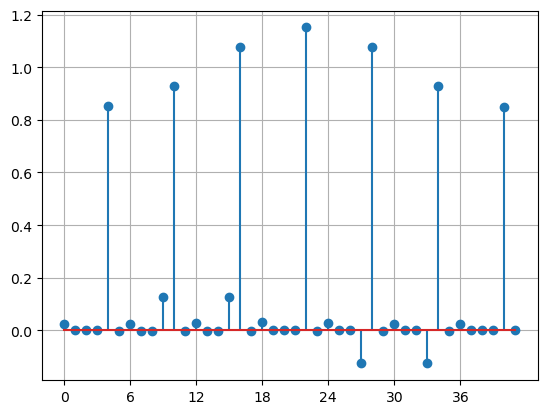

In [179]:
plt.stem(1e6*dfs)
plt.xticks(range(0,6*7,6))
plt.grid()

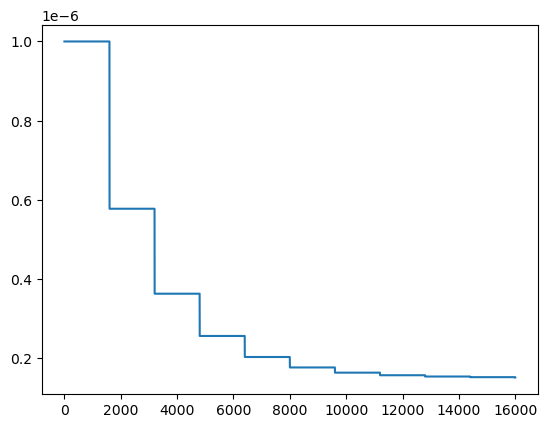

In [207]:
dfs = np.vstack(df['M1RigidBodyMotions'])
plt.plot(dfs[:,4]);

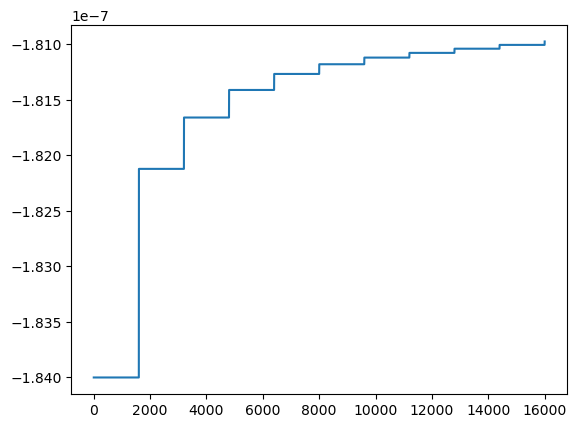

In [211]:
plt.plot(dfs[:,14]);

In [206]:
dfs[0,:]

array([ 0.00e+00,  0.00e+00,  9.60e-08,  0.00e+00,  1.00e-06,  0.00e+00,
        0.00e+00,  0.00e+00,  1.57e-07,  0.00e+00,  1.00e-06,  0.00e+00,
        0.00e+00,  0.00e+00, -1.84e-07,  0.00e+00,  1.00e-06,  0.00e+00,
        0.00e+00,  0.00e+00, -2.34e-07,  0.00e+00,  1.00e-06,  0.00e+00,
        0.00e+00,  0.00e+00, -2.10e-08,  0.00e+00,  1.00e-06,  0.00e+00,
        0.00e+00,  0.00e+00, -4.40e-08,  0.00e+00,  1.00e-06,  0.00e+00,
        0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00,  1.00e-06,  0.00e+00])